# Attribute to tag file


### 1. pr plot

In [6]:
'''
    read result file
    generate csv file
'''
import numpy as np 
import csv

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import re
# resultfile = '/home/lz/TMM2022/plotfold/attribute_plot.txt'
# with open(resultfile, 'r') as f:
#     attributevalue = f.readlines()
# for i, line in enumerate(attributevalue):
#     trackername = line.split("cite")[0]
#     value_bc = re.findall(r"d+.?d",line.split('&')[1])
#     value_rt = line.split('&')[2]
#     value_ds = line.split('&')[3]
#     value_so = line.split('&')[4]
#     value_dc = line.split('&')[5]
tracker_name = ['Siam_LTD', 'STARK_rgbd', 'TSDM', 'CLGS-D', 'CA3DMS', 'DSKCF_shape', 'ATCAIS', 'SLMD','CSRKCF','DAL','TALGD','sttc_rgbd',
'DRefine','DDiMP', 'DeT', 'SiamDW-D', 'LTDSEd']
value = [[0.310, 0.560, 0.554, 0.327, 0.473],
         [0.519, 0.776, 0.789, 0.493, 0.699],
         [0.251, 0.562, 0.564, 0.341, 0.481],
         [0.283, 0.647, 0.676, 0.386, 0.630],
         [0.236, 0.131, 0.316, 0.199, 0.201],
         [0.023, 0.031, 0.049, 0.028, 0.027],
         [0.428, 0.661, 0.753, 0.436, 0.652],
         [0.394, 0.651, 0.719, 0.464, 0.609],
         [0.085, 0.160, 0.186, 0.110, 0.145],
         [0.334, 0.543, 0.620, 0.446, 0.515],
         [0.431, 0.721, 0.764, 0.448, 0.683],
         [0.386, 0.724, 0.711, 0.408, 0.633],
         [0.393, 0.701, 0.720, 0.440, 0.613],
         [0.379, 0.648, 0.724, 0.466, 0.618],
         [0.437, 0.619, 0.627, 0.458, 0.578],
         [0.345, 0.428, 0.637, 0.371, 0.295 ],
         [0.366, 0.532, 0.633, 0.421, 0.305]
]
x_axis = np.array(['','BC','RT',
 'DS',
 'SO',
 'DC']).T

fscore_data = np.array(value)

plot_fscore = np.hstack((x_axis.reshape(6,1), np.vstack((np.array(tracker_name), np.array(fscore_data).T))))

with open('./attribute_fscore.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(plot_fscore)



f_data = pd.read_csv('./attribute_fscore.csv',index_col=0)

f_data
# plot_fscore









,Siam_LTD,STARK_rgbd,TSDM,CLGS-D,CA3DMS,DSKCF_shape,ATCAIS,SLMD,CSRKCF,DAL,TALGD,sttc_rgbd,DRefine,DDiMP,DeT,SiamDW-D,LTDSEd
BC,0.310,0.519,0.251,0.283,0.236,0.023,0.428,0.394,0.085,0.334,0.431,0.386,0.393,0.379,0.437,0.345,0.366
RT,0.560,0.776,0.562,0.647,0.131,0.031,0.661,0.651,0.160,0.543,0.721,0.724,0.701,0.648,0.619,0.428,0.532
DS,0.554,0.789,0.564,0.676,0.316,0.049,0.753,0.719,0.186,0.620,0.764,0.711,0.720,0.724,0.627,0.637,0.633
SO,0.327,0.493,0.341,0.386,0.199,0.028,0.436,0.464,0.110,0.446,0.448,0.408,0.440,0.466,0.458,0.371,0.421
DC,0.473,0.699,0.481,0.630,0.201,0.027,0.652,0.609,0.145,0.515,0.683,0.633,0.613,0.618,0.578,0.295,0.305


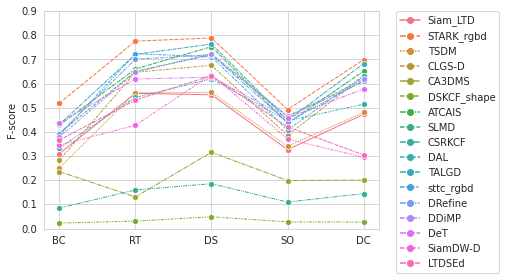

In [14]:
sns.set_style("whitegrid")

# markers = ['s','v','^','D','X','o']
markers = ['o' for i in range(len(tracker_name))]
plt.figure()
fscore_plot = sns.lineplot(data= f_data, linewidth=1, markers=markers)
# su_plot.set_title("Success plots of Attribute")
# su_plot.set_xlabel("Overlap threshold", fontsize=10)
fscore_plot.set_ylabel("F-score", fontsize=10)
# plt legend
h, l = fscore_plot.get_legend_handles_labels()
# plt.legend(h,l, ncol=1, loc=2, bbox_to_anchor = (1,1))
plt.legend(h,l, ncol=2, loc=1)
# legend = su_plot.legend()
# plt.legend(prop={'weight/':'bold'})
# plt.setp(su_plot.get_legend().get_texts()[5], )
plt.ylim(0,0.9)
# plt.rcParams['font.sans-serif'] = ['SimHei']

plt.setp(fscore_plot.get_legend().get_texts(), fontsize='10')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0), borderaxespad = 0.)
# fig = iou_plot.get_figure()
plt.savefig('./fscore_attribute.png', dpi=400)

In [21]:
import csv
tag_list = [
'background-clutter',
 'deformation', 'rotate--plane', 'rotate-in-plane']
su_data_plot = []
pr_data_plot = []
tracker_namelist = ['P2B_without_train_36pth',  'P2B_fintuned_72pth', \
'BAT_without_train_log', 'BAT_Trained_7d_log', 'SC3D_model_OnlyTracking','Trackit3D_71pth']

for tracker in tracker_namelist:
    tracker_su = []
    tracker_pr = []
    for tag in tag_list:
        tracker_su.append(np.array(su_result_dict[tracker][tag]))
        tracker_pr.append(np.array(pr_result_dict[tracker][tag]))
    su_data_plot.append(np.array(tracker_su))
    pr_data_plot.append(np.array(tracker_pr))
new_tracker_namelist = ['P2B', 'P2B(ft)', 'BAT', 'BAT(ft)', 'SC3D', 'TrackIt3D']
x_axis = np.array(['','BC','RT',
 'DS',
 'SO',
 'DC']).T
plot_su = np.hstack((x_axis.reshape(6,1), np.vstack((np.array(new_tracker_namelist), np.array(su_data_plot).T))))
plot_pr = np.hstack((x_axis.reshape(6,1), np.vstack((np.array(new_tracker_namelist), np.array(pr_data_plot).T))))

with open('./attribute_su.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(plot_su)

with open('./attribute_pr.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(plot_pr)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
su_data = pd.read_csv('/home/yangjinyu/cvpr2022/dataset_process/process_ipynb/attribute_su.csv',index_col=0)
pr_data = pd.read_csv('/home/yangjinyu/cvpr2022/dataset_process/process_ipynb/attribute_pr.csv', index_col=0)

su_data


,P2B,P2B(ft),BAT,BAT(ft),SC3D,TrackIt3D
PCS,2.908560,3.103113,2.5,2.5,0.000000,13.044747
BC,4.889341,9.288618,2.5,2.5,9.774775,35.280036
CM,4.766402,15.316435,2.5,2.5,0.000000,37.321074
TL,2.500000,2.626582,2.5,2.5,2.500000,21.930380
IV,6.084437,17.309603,2.5,2.5,0.000000,40.543598
ST,5.287298,9.102823,2.5,2.5,9.774775,36.396169
DF,4.706096,9.829463,2.5,2.5,0.000000,34.346880
OR,4.639571,10.249233,2.5,2.5,0.000000,33.911043
IR,3.272727,7.727273,2.5,2.5,0.000000,36.395455


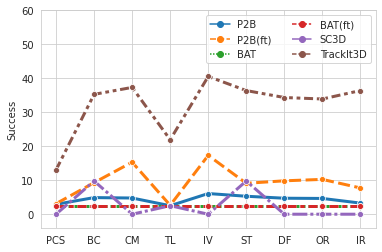

In [23]:
sns.set_style("whitegrid")

# markers = ['s','v','^','D','X','o']
markers = ['o','o','o','o','o','o']
plt.figure()
su_plot = sns.lineplot(data= su_data, linewidth=3, markers=markers)
# su_plot.set_title("Success plots of Attribute")
# su_plot.set_xlabel("Overlap threshold", fontsize=10)
su_plot.set_ylabel("Success", fontsize=10)
# plt legend
h, l = su_plot.get_legend_handles_labels()
# plt.legend(h,l, ncol=1, loc=2, bbox_to_anchor = (1,1))
plt.legend(h,l, ncol=2, loc=1)
# legend = su_plot.legend()
# plt.legend(prop={'weight/':'bold'})
# plt.setp(su_plot.get_legend().get_texts()[5], )
plt.ylim(-4,60)
# plt.rcParams['font.sans-serif'] = ['SimHei']

plt.setp(su_plot.get_legend().get_texts(), fontsize='10')
# fig = iou_plot.get_figure()
plt.savefig('./su_attribute.png', dpi=2000)

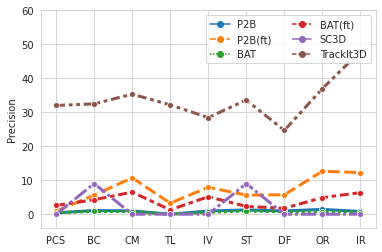

In [24]:
plt.figure('pr')

pr_plot = sns.lineplot(data=pr_data, linewidth=3, markers=markers)
# pr_plot.set_title("Precision plots of Attribute")
# pr_plot.set_xlabel("Location error threshold", fontsize=10)
pr_plot.set_ylabel("Precision", fontsize=10)
# plt legend
h, l = pr_plot.get_legend_handles_labels()
plt.legend(h,l, ncol=2, loc=1)
plt.ylim(-4,60)
# plt.rcParams['lines.markersize']=10
# fig = pr_plot.get_figure()
plt.setp(pr_plot.get_legend().get_texts(), fontsize='10')

plt.savefig('./pr_attribute.png', dpi=2000)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as sp


x = np.random.randn(100000)
y = np.random.randn(100000) + 5

# normal distribution center at x=0 and y=5
fig1 = plt.subplot(2,2,1)
plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.title('Heatmap without smoothing')
plt.xlabel("X")
plt.ylabel("Y")


# smoothing

X = sp.filters.gaussian_filter(x, sigma = 3, order = 0)
Y = sp.filters.gaussian_filter(y, sigma = 3, order = 0)


heatmap, xedges, yedges = np.histogram2d(X, Y, bins=40)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

fig1 = plt.subplot(2,2,2)
plt.imshow(heatmap, extent=extent)
plt.colorbar()
plt.title('Heatmap with smoothing')
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('./heatmap.png', dpi=2000)
plt.show()

## Point cloud sparsity

In [274]:
# dataset
test_data_dir = '/data1/yjy/G3D/experiment_kitti/final_test/velodyne'
all_point_number = 0
all_frame_number = 0
for root, dir, file_name_list in os.walk(test_data_dir):
    for filename in file_name_list:
        filepath = os.path.join(root, filename)
        if not os.path.exists(filepath):
            print(filepath)
        with open(filepath, 'rb') as f:
            value = np.load(f)
            all_point_number += len(value[:,0])
            all_frame_number += 1
print('all points number: {},  average number: {} ({} frames)'.format(all_point_number, all_point_number/all_frame_number, all_frame_number))



all points number: 1719162581,  average number: 276215.06764138816 (6224 frames)


In [278]:
from plyfile import PlyData, PlyElement
visulize_data_dir = '/data1/yjy/G3D/summary_dataset/visualize/multip_scipy_pc_ply/'

all_point_number = 0
all_frame_number = 0
for root, dir, file_name_list in os.walk(visulize_data_dir):
    for filename in file_name_list:
        filepath = os.path.join(root, filename)
        if not os.path.exists(filepath):
            print(filepath)
        with open(filepath, 'rb') as f:
            # value = np.load(f, allow_pickle=True)
            value = PlyData.read(f)
            all_point_number += value.elements[0].count
            try:
                x = value.elements[1]
                print('element 1 exists')
            except:

                all_frame_number += 1
print('all points number: {},  average number: {} ({} frames)'.format(all_point_number, all_point_number/all_frame_number, all_frame_number))



all points number: 145656404,  average number: 23402.37853470437 (6224 frames)


## Attribute distribution eccv2022 plot

In [16]:
import numpy as np
tag_list = ['sparse-cloud',
 'background-clutter',
 'camera-motion',
 'target-loss',
 'illumination',
 'rotation',
 'similar-objects',
 'deformation', 'rotate-in-plane', 'rotate-out-plane']
    
for i, tag in enumerate(tag_list):
    seq_count = 0
    frame_count = 0
    if not tag == 'target-loss':
        continue
    for seq in seq_list:
        tagfile = os.path.join(test_dir, seq, '{}.tag'.format(tag))
        with open(tagfile, 'r') as f:
            value = np.loadtxt(f)
            number = np.sum(value == 1)
            frame_count = frame_count + number 
        if number > 0:
            seq_count += 1
            print(seq)
    print('{} frame: {} seq_count: {}'.format(tag, frame_count,seq_count))

fire_extinguisher01_1
book02
trashbin_1
badmintonplayer
laptop02
balloon02_1
toy_car01_1
human04
target-loss frame: 237 seq_count: 8
